In [111]:
#Importing the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

## Requests Library:
The requests library in Python is used for making HTTP requests to web servers and interacting with web APIs. It provides a simple and elegant way to send HTTP requests and handle responses, making it a popular choice for web scraping, accessing web APIs, and performing various web-related tasks.

## BeautifulSoup:
Beautiful Soup is a Python library used for parsing HTML and XML documents, extracting information, and navigating the parsed tree structure. It's commonly used for web scraping tasks where you need to extract specific data from web pages. While Beautiful Soup is often used in conjunction with requests to fetch web pages, it's not directly used with Pandas.

However, you can use Beautiful Soup in combination with Pandas to extract data from HTML documents and then convert it into a DataFrame for further analysis. Here's a typical workflow:

- Use requests to fetch HTML content from a web page.
- Parse the HTML content using Beautiful Soup to create a BeautifulSoup object.
- Use Beautiful Soup methods to navigate the HTML structure and extract the desired data.
- Convert the extracted data into a Pandas DataFrame for analysis.

## Regular Expressions(re):
In Pandas, the re (regular expression) module is commonly used in combination with methods like str.contains(), str.match(), str.extract(), and str.replace() to perform various text processing and pattern matching operations on string columns in DataFrame.

## Matplotlib and Seaborn:
Matplotlib and Seaborn aare comprehensive libraries for creating static, interactive, and animated visualizations in Python. It provides a wide range of plotting functions and customization options, making it one of the most widely used libraries for data visualization in Python.

# Top 100 T20 Batsman Rankings

In [112]:
#Reading the data
url="https://sports.ndtv.com/cricket/icc-rankings/t20-batting"
table=requests.get(url)
soap=BeautifulSoup(table.text) #Using beautiful soup we are converting source code to HTML format.
data=soap.find_all("tr",class_="rnk_tbl-tr")

#Extracting data and appending into empty lists using loops and RegEX. 
Rank=[]
Players=[]
Team=[]
Rating=[]
Career_bestRat=[]
Opposition=[]
Year=[]
for i in data[1:]:
    Rank.append(i.text.split()[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    if len(b)>0:
        Opposition.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    if len(b)>0:
        Year.append(b[0])   

In [113]:
#Creating a dataframe from the above extracted data.
data1=pd.DataFrame({"Rank":Rank,"Player":Players,"Team":Team,"Rating":Rating,"CareerBestRating":Career_bestRat,"Opposition":Opposition,"Year":Year})
data1

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,India,861,910,New,2023
1,2,Phil Salt,England,802,802,West,2023
2,3,Mohammad Rizwan,Pakistan,784,875,England,2022
3,4,Babar Azam,Pakistan,763,896,England,2019
4,5,Aiden Markram,Africa,755,796,England,2021
...,...,...,...,...,...,...,...
95,=,Nikolaas Davin,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,Zimbabwe,371,514,Afghanistan,2022
98,=,Matthew Short,Australia,371,439,South,2023


In [114]:
#Removing unecassary values from the dataframe. 
data1["Player"]=data1["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama"})
data1["Team"]=data1["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data1["Opposition"]=data1["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong"})

In [115]:
data1

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,India,861,910,New Zealand,2023
1,2,Phil Salt,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,Pakistan,784,875,England,2022
3,4,Babar Azam,Pakistan,763,896,England,2019
4,5,Aiden Markram,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...
95,=,Nikolaas Davin,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,Zimbabwe,371,514,Afghanistan,2022
98,=,Matthew Short,Australia,371,439,South Africa,2023


In [116]:
Style=["RH"]*100
Style[5]=Style[5].replace("RH","LH")
Style[6]=Style[6].replace("RH","LH")
Style[10]=Style[10].replace("RH","LH")
Style[15]=Style[15].replace("RH","LH")
Style[16]=Style[16].replace("RH","LH")
Style[17]=Style[17].replace("RH","LH")
Style[26]=Style[26].replace("RH","LH")
Style[33]=Style[33].replace("RH","LH")
Style[34]=Style[34].replace("RH","LH")
Style[36]=Style[36].replace("RH","LH")
Style[39]=Style[39].replace("RH","LH")
Style[44]=Style[44].replace("RH","LH")
Style[53]=Style[53].replace("RH","LH")
Style[54]=Style[54].replace("RH","LH")
Style[62]=Style[62].replace("RH","LH")
Style[64]=Style[64].replace("RH","LH")
Style[68]=Style[68].replace("RH","LH")
Style[70]=Style[70].replace("RH","LH")
Style[72]=Style[72].replace("RH","LH")

In [117]:
#Adding an extra column to the dataframe.
data1["Style"]=Style
data1=data1[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
data1

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,RH,India,861,910,New Zealand,2023
1,2,Phil Salt,RH,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,RH,Pakistan,784,875,England,2022
3,4,Babar Azam,RH,Pakistan,763,896,England,2019
4,5,Aiden Markram,RH,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...,...
95,=,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,RH,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,RH,Zimbabwe,371,514,Afghanistan,2022
98,=,Matthew Short,RH,Australia,371,439,South Africa,2023


In [118]:
data1.loc[data1["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
17,=,Tim Seifert,LH,New Zealand,622,685,Pakistan,2020
54,=,Ishan Kishan,LH,India,484,717,Ireland,2022
56,=,Hazratullah Zazai,RH,Afghanistan,476,736,West Indies,2019
75,=,Hardik Pandya,RH,India,415,490,West Indies,2023
78,=,JJ Smit,RH,Namibia,411,445,Netherlands,2024
95,=,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
98,=,Matthew Short,RH,Australia,371,439,South Africa,2023


In [119]:
data1.loc[95,"Rank"]=96
data1.loc[98,"Rank"]=99
data1.loc[78,"Rank"]=79
data1.loc[56,"Rank"]=57
data1.loc[54,"Rank"]=55
data1.loc[75,"Rank"]=76
data1.loc[78,"Rank"]=79
data1.loc[17,"Rank"]=18

In [120]:
#Exporting to csv file
data1.to_csv("T20_Batting_rank.csv")

In [121]:
#Reading the csv file
df=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\T20_Batting_rank.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,RH,India,861,910,New Zealand,2023
1,2,Phil Salt,RH,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,RH,Pakistan,784,875,England,2022
3,4,Babar Azam,RH,Pakistan,763,896,England,2019
4,5,Aiden Markram,RH,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...,...
95,96,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,RH,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,RH,Zimbabwe,371,514,Afghanistan,2022
98,99,Matthew Short,RH,Australia,371,439,South Africa,2023


# Data Cleaning

Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [122]:
df.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [123]:
#Converting the datatypes in the dataframe.
df["Rank"]=df["Rank"].astype(int)
df["Rating"]=df["Rating"].astype(int)
df["CareerBestRating"]=df["CareerBestRating"].astype(int)
df["Year"]=df["Year"].astype(int)

In [124]:
df.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [125]:
#Checking the nullvalues in the df dataset
df.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [126]:
#There are no null values in the df dataframe.

# ODI TOP 100 Batsman Rankings

In [127]:
url1="https://sports.ndtv.com/cricket/icc-rankings/odi-batting"
ODI=requests.get(url1)
soup1=BeautifulSoup(ODI.text)
ODI1=soup1.find_all("tr",class_="rnk_tbl-tr")

#Extracting data and appending into empty lists using loops and RegEX. 
Rank1=[]
Players1=[]
Team1=[]
Rating1=[]
Career_bestRat1=[]
Opposition1=[]
Year1=[]
for i in ODI1[1:]:
    Rank1.append(i.text.split()[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    if len(b)>0:
        Opposition1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    if len(b)>0:
        Year1.append(b[0])   

In [128]:
#Creating a dataframe from the above extracted data.
dat2=pd.DataFrame({"Rank":Rank1,"Player":Players1,"Team":Team1,"Rating":Rating1,"CareerBestRating":Career_bestRat1,"Opposition":Opposition1,"Year":Year1})
dat2

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Babar Azam,Pakistan,824,898,West,2022
1,2,Shubman Gill,India,801,847,Australia,2023
2,3,Virat Kohli,India,768,909,England,2018
3,4,Rohit Sharma,India,746,882,Sri,2019
4,=,Harry Tector,Ireland,746,767,Afghanistan,2024
...,...,...,...,...,...,...,...
95,96,Najibullah Zadran,Afghanistan,437,555,Sri,2023
96,=,Bas de,Netherlands,437,456,New,2023
97,98,George Dockrell,Ireland,435,460,Zimbabwe,2023
98,=,Avishka Fernando,Lanka,435,592,South,2021


In [129]:
#Removing unecassary values from the dataframe. 
dat2["Player"]=dat2["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama","Pakistan672815 v":"Imam-ul-Huq"})
dat2["Team"]=dat2["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
dat2["Opposition"]=dat2["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong","New":"NewGuinea"})

In [130]:
dat2

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Babar Azam,Pakistan,824,898,West Indies,2022
1,2,Shubman Gill,India,801,847,Australia,2023
2,3,Virat Kohli,India,768,909,England,2018
3,4,Rohit Sharma,India,746,882,SriLanka,2019
4,=,Harry Tector,Ireland,746,767,Afghanistan,2024
...,...,...,...,...,...,...,...
95,96,Najibullah Zadran,Afghanistan,437,555,SriLanka,2023
96,=,Bas de,Netherlands,437,456,NewGuinea,2023
97,98,George Dockrell,Ireland,435,460,Zimbabwe,2023
98,=,Avishka Fernando,Sri Lanka,435,592,South Africa,2021


In [131]:
Style1=["RH"]*100
Style1[6]=Style1[6].replace("RH","LH")
Style1[8]=Style1[8].replace("RH","LH")
Style1[12]=Style1[12].replace("RH","LH")
Style1[18]=Style1[18].replace("RH","LH")
Style1[19]=Style1[19].replace("RH","LH")
Style1[32]=Style1[32].replace("RH","LH")
Style1[37]=Style1[37].replace("RH","LH")
Style1[43]=Style1[43].replace("RH","LH")
Style1[44]=Style1[44].replace("RH","LH")
Style1[53]=Style1[53].replace("RH","LH")
Style1[62]=Style1[62].replace("RH","LH")
Style1[80]=Style1[80].replace("RH","LH")
Style1[89]=Style1[89].replace("RH","LH")

In [132]:
#Adding an extra column to the dataframe.
dat2["Style"]=Style1
dat2=dat2[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
dat2

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Babar Azam,RH,Pakistan,824,898,West Indies,2022
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
4,=,Harry Tector,RH,Ireland,746,767,Afghanistan,2024
...,...,...,...,...,...,...,...,...
95,96,Najibullah Zadran,RH,Afghanistan,437,555,SriLanka,2023
96,=,Bas de,RH,Netherlands,437,456,NewGuinea,2023
97,98,George Dockrell,RH,Ireland,435,460,Zimbabwe,2023
98,=,Avishka Fernando,RH,Sri Lanka,435,592,South Africa,2021


In [133]:
dat2.loc[dat2["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
4,=,Harry Tector,RH,Ireland,746,767,Afghanistan,2024
19,=,Travis Head,LH,Australia,654,679,India,2023
29,=,Mohammad Rizwan,RH,Pakistan,597,602,Australia,2023
31,=,Gerhard Erasmus,RH,Namibia,596,618,United,2023
43,=,Nicholas Pooran,LH,West Indies,565,634,Ireland,2020
53,=,Rachin Ravindra,LH,New Zealand,532,560,SriLanka,2023
60,=,Aaron Jones,RH,USA,510,540,Papua,2023
68,=,Kyle Coetzer,RH,Scotland,491,678,Papua,2019
71,=,Curtis Campher,RH,Ireland,487,487,Afghanistan,2024
73,=,Glenn Phillips,RH,New Zealand,481,496,India,2023


In [134]:
dat2.loc[4,"Rank"]=5
dat2.loc[19,"Rank"]=20
dat2.loc[29,"Rank"]=30
dat2.loc[31,"Rank"]=32
dat2.loc[43,"Rank"]=44
dat2.loc[53,"Rank"]=54
dat2.loc[60,"Rank"]=61
dat2.loc[68,"Rank"]=69
dat2.loc[71,"Rank"]=72
dat2.loc[73,"Rank"]=74
dat2.loc[76,"Rank"]=77
dat2.loc[82,"Rank"]=83
dat2.loc[91,"Rank"]=92
dat2.loc[96,"Rank"]=97
dat2.loc[98,"Rank"]=99

In [135]:
#Exporting to CSVfile 
dat2.to_csv("ODI_batting.csv")

In [136]:
#Reading the csv file
df1=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\ODI_Batting.csv")
df1.drop("Unnamed: 0",axis=1,inplace=True)
df1

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Babar Azam,RH,Pakistan,824,898,West Indies,2022
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
4,5,Harry Tector,RH,Ireland,746,767,Afghanistan,2024
...,...,...,...,...,...,...,...,...
95,96,Najibullah Zadran,RH,Afghanistan,437,555,SriLanka,2023
96,97,Bas de,RH,Netherlands,437,456,NewGuinea,2023
97,98,George Dockrell,RH,Ireland,435,460,Zimbabwe,2023
98,99,Avishka Fernando,RH,Sri Lanka,435,592,South Africa,2021


# Data Cleaning


Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [137]:
df1.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [138]:
#Converting the datatypes in the dataframe.
df1["Rank"]=df1["Rank"].astype(int)
df1["Rating"]=df1["Rating"].astype(int)
df1["CareerBestRating"]=df1["CareerBestRating"].astype(int)
df1["Year"]=df1["Year"].astype(int)

In [139]:
df1.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [140]:
#df1 dataframe contains 100 entries and 8 columns with int,object datatypes.

In [141]:
# Checking the nul values in df1 datsset
df1.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [142]:
## There are no null values in the dataset.

# Test TOP 100 Batsman Rankings

In [143]:
#Reading the data
url2="https://sports.ndtv.com/cricket/icc-rankings/test-batting"
Test=requests.get(url2)
soup2=BeautifulSoup(Test.text)
data2=soup2.find_all("tr",class_="rnk_tbl-tr")


#Extracting data and appending into empty lists using loops and RegEX. 
Rank2=[]
Players2=[]
Team2=[]
Rating2=[]
Career_bestRat2=[]
Opposition2=[]
Year2=[]
for i in data2[1:]:
    Rank2.append(i.text.split()[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    if len(b)>0:
        Opposition2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    if len(b)>0:
        Year2.append(b[0])   

In [144]:
#Creating a dataframe from the above extracted data.
data3=pd.DataFrame({"Rank":Rank2,"Player":Players2,"Team":Team2,"Rating":Rating2,"CareerBestRating":Career_bestRat2,"Opposition":Opposition2,"Year":Year2})
data3

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Kane Williamson,Zealand,859,919,Pakistan,2021
1,2,Joe Root,England,824,923,India,2022
2,3,Babar Azam,Pakistan,768,882,New,2022
3,=,Daryl Mitchell,Zealand,768,804,Bangladesh,2023
4,5,Steve Smith,Australia,757,947,South,2018
...,...,...,...,...,...,...,...
95,96,Kevin Sinclair,Indies,349,349,Australia,2024
96,97,Alick Athanaze,Indies,346,407,India,2023
97,98,Nurul Hasan,Bangladesh,343,410,West,2022
98,99,Paul Stirling,Ireland,340,366,Sri,2023


In [145]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    object
 1   Player            100 non-null    object
 2   Team              100 non-null    object
 3   Rating            100 non-null    object
 4   CareerBestRating  100 non-null    object
 5   Opposition        100 non-null    object
 6   Year              100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [146]:
#Removing unecassary values from the dataframe. 
data3["Player"]=data3["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama"})
data3["Team"]=data3["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data3["Opposition"]=data3["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong","New":"NewGuinea"})

In [147]:
Style3=["RH"]*100
Style3[6]=Style[3].replace("RH","LH")
Style3[10]=Style[10].replace("RH","LH")
Style3[12]=Style[12].replace("RH","LH")
Style3[23]=Style[23].replace("RH","LH")
Style3[30]=Style[30].replace("RH","LH")
Style3[33]=Style[33].replace("RH","LH")
Style3[34]=Style[34].replace("RH","LH")
Style3[37]=Style[37].replace("RH","LH")
Style3[38]=Style[38].replace("RH","LH")
Style3[40]=Style[40].replace("RH","LH")
Style3[42]=Style[42].replace("RH","LH")
Style3[43]=Style[43].replace("RH","LH")
Style3[44]=Style[44].replace("RH","LH")
Style3[53]=Style[53].replace("RH","LH")
Style3[65]=Style[65].replace("RH","LH")

In [148]:
#Adding an extra column to the dataframe.
data3["Style"]=Style3
data3=data3[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
data3

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Kane Williamson,RH,New Zealand,859,919,Pakistan,2021
1,2,Joe Root,RH,England,824,923,India,2022
2,3,Babar Azam,RH,Pakistan,768,882,NewGuinea,2022
3,=,Daryl Mitchell,RH,New Zealand,768,804,Bangladesh,2023
4,5,Steve Smith,RH,Australia,757,947,South Africa,2018
...,...,...,...,...,...,...,...,...
95,96,Kevin Sinclair,RH,West Indies,349,349,Australia,2024
96,97,Alick Athanaze,RH,West Indies,346,407,India,2023
97,98,Nurul Hasan,RH,Bangladesh,343,410,West Indies,2022
98,99,Paul Stirling,RH,Ireland,340,366,SriLanka,2023


In [149]:
data3.loc[data3["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
3,=,Daryl Mitchell,RH,New Zealand,768,804,Bangladesh,2023
26,=,Cameron Green,RH,Australia,634,661,NewGuinea,2024
46,=,Kamindu Mendis,RH,Sri Lanka,533,533,Bangladesh,2024
62,=,Nkrumah Bonner,RH,West Indies,482,631,England,2022
68,=,Glenn Phillips,RH,New Zealand,470,521,Australia,2024
91,=,Sarfaraz Khan,RH,India,355,419,England,2024


In [150]:
data3.loc[3,"Rank"]=4
data3.loc[26,"Rank"]=27
data3.loc[46,"Rank"]=47
data3.loc[62,"Rank"]=63
data3.loc[68,"Rank"]=69
data3.loc[91,"Rank"]=92

In [151]:
# Exporting to csv file
data3.to_csv("Test_Batting.csv")

In [152]:
#Reading the csv file
df2=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\Test_Batting.csv")
df2.drop("Unnamed: 0",axis=1,inplace=True)
df2

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Kane Williamson,RH,New Zealand,859,919,Pakistan,2021
1,2,Joe Root,RH,England,824,923,India,2022
2,3,Babar Azam,RH,Pakistan,768,882,NewGuinea,2022
3,4,Daryl Mitchell,RH,New Zealand,768,804,Bangladesh,2023
4,5,Steve Smith,RH,Australia,757,947,South Africa,2018
...,...,...,...,...,...,...,...,...
95,96,Kevin Sinclair,RH,West Indies,349,349,Australia,2024
96,97,Alick Athanaze,RH,West Indies,346,407,India,2023
97,98,Nurul Hasan,RH,Bangladesh,343,410,West Indies,2022
98,99,Paul Stirling,RH,Ireland,340,366,SriLanka,2023


# Data Cleaning


Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [153]:
df2.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [154]:
#Converting the datatypes in the dataframe.
df2["Rank"]=df2["Rank"].astype(int)
df2["Rating"]=df2["Rating"].astype(int)
df2["CareerBestRating"]=df2["CareerBestRating"].astype(int)
df2["Year"]=df2["Year"].astype(int)

In [155]:
df2.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [156]:
#df2 dataframe contains 100 entries and 8 columns with int,object datatypes.

In [157]:
# Checking the nullvalues in the dataset
df2.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [158]:
## There are no nulvalues in df2 dataframe.

# T20 Top 100 Bowler Rankings

In [159]:
#Reading the data
url3="https://sports.ndtv.com/cricket/icc-rankings/t20-bowling"
T20BOWL=requests.get(url3)
Soap3=BeautifulSoup(T20BOWL.text)
data3=Soap3.find_all("tr",class_="rnk_tbl-tr")

#Extracting data and appending into empty lists using loops and RegEX. 
Rank3=[]
Players3=[]
Team3=[]
Rating3=[]
Career_bestRat3=[]
Opposition3=[]
Year3=[]
for i in data3[1:]:
    Rank3.append(i.text.split()[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    Opposition3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    Year3.append(b[0])

In [160]:
#Creating a dataframe from the above extracted data.
data4=pd.DataFrame({"Rank":Rank3,"Player":Players3,"Team":Team3,"Rating":Rating3,"CareerBestRating":Career_bestRat3,"Opposition":Opposition3,"Year":Year3})
data4

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Adil Rashid,England,726,746,West,2022
1,2,Wanindu Hasaranga,Lanka,687,797,West,2021
2,3,Akeal Hosein,Indies,664,683,England,2023
3,4,Axar Patel,India,660,667,Afghanistan,2024
4,5,Maheesh Theekshana,Lanka,659,684,New,2023
...,...,...,...,...,...,...,...
95,96,Ali Naseer,Emirates,370,441,Afghanistan,2024
96,97,Karim Janat,Afghanistan,368,530,Ireland,2020
97,98,Craig Young,Ireland,366,409,New,2022
98,99,Gerhard Erasmus,Namibia,365,430,Zimbabwe,2023


In [161]:
#Removing unecassary values from the dataframe. 
data4["Player"]=data4["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama"})
data4["Team"]=data4["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data4["Opposition"]=data4["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong","New":"NewGuinea"})

In [162]:
Style4=['RA']*100
Style4[3]=Style4[3].replace('RA','LA')
Style4[9]=Style4[9].replace('RA','LA')
Style4[12]=Style4[12].replace('RA','LA')
Style4[16]=Style4[16].replace('RA','LA')
Style4[19]=Style4[19].replace('RA','LA')
Style4[23]=Style4[23].replace('RA','LA')
Style4[25]=Style4[25].replace('RA','LA')
Style4[29]=Style4[29].replace('RA','LA')
Style4[31]=Style4[31].replace('RA','LA')
Style4[47]=Style4[17].replace('RA','LA')
Style4[61]=Style4[61].replace('RA','LA')

In [163]:
#Adding an extra column to the dataframe.
data4["Style"]=Style4
data4=data4[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
data4

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Adil Rashid,RA,England,726,746,West Indies,2022
1,2,Wanindu Hasaranga,RA,Sri Lanka,687,797,West Indies,2021
2,3,Akeal Hosein,RA,West Indies,664,683,England,2023
3,4,Axar Patel,LA,India,660,667,Afghanistan,2024
4,5,Maheesh Theekshana,RA,Sri Lanka,659,684,NewGuinea,2023
...,...,...,...,...,...,...,...,...
95,96,Ali Naseer,RA,United Arab Emirates,370,441,Afghanistan,2024
96,97,Karim Janat,RA,Afghanistan,368,530,Ireland,2020
97,98,Craig Young,RA,Ireland,366,409,NewGuinea,2022
98,99,Gerhard Erasmus,RA,Namibia,365,430,Zimbabwe,2023


In [164]:
data4.loc[data4["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
5,=,Ravi Bishnoi,RA,India,659,699,Australia,2023
7,=,Tabraiz Shamsi,RA,South Africa,654,821,West Indies,2021
14,=,Fazalhaq Farooqi,RA,Afghanistan,627,692,Pakistan,2023
24,=,Kuldeep Yadav,RA,India,578,730,NewGuinea,2019
28,=,Nathan Ellis,RA,Australia,567,567,NewGuinea,2024
46,=,Hasan Mahmud,RA,Bangladesh,478,529,Ireland,2023
49,=,Yuzvendra Chahal,RA,India,475,706,Bangladesh,2018
57,=,Mohammad Nawaz,RA,Pakistan,452,560,England,2022
66,=,Trent Boult,RA,New Zealand,430,653,SriLanka,2022
72,=,Chamika Karunaratne,RA,Sri Lanka,412,500,Australia,2022


In [165]:
data4.loc[5,"Rank"]=6
data4.loc[7,"Rank"]=8
data4.loc[24,"Rank"]=25
data4.loc[25,"Rank"]=26
data4.loc[28,"Rank"]=29
data4.loc[46,"Rank"]=47
data4.loc[49,"Rank"]=50
data4.loc[57,"Rank"]=58
data4.loc[66,"Rank"]=67
data4.loc[72,"Rank"]=73
data4.loc[74,"Rank"]=75
data4.loc[79,"Rank"]=80
data4.loc[82,"Rank"]=83
data4.loc[14,"Rank"]=15

In [166]:
# Exporting to CSV file
data4.to_csv("T20_bowling.csv")

In [167]:
#Reading the Csv file
df3=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\T20_bowling.csv")
df3.drop("Unnamed: 0",axis=1,inplace=True)
df3

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Adil Rashid,RA,England,726,746,West Indies,2022
1,2,Wanindu Hasaranga,RA,Sri Lanka,687,797,West Indies,2021
2,3,Akeal Hosein,RA,West Indies,664,683,England,2023
3,4,Axar Patel,LA,India,660,667,Afghanistan,2024
4,5,Maheesh Theekshana,RA,Sri Lanka,659,684,NewGuinea,2023
...,...,...,...,...,...,...,...,...
95,96,Ali Naseer,RA,United Arab Emirates,370,441,Afghanistan,2024
96,97,Karim Janat,RA,Afghanistan,368,530,Ireland,2020
97,98,Craig Young,RA,Ireland,366,409,NewGuinea,2022
98,99,Gerhard Erasmus,RA,Namibia,365,430,Zimbabwe,2023


# Data Cleaning


Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [168]:
df3.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [169]:
#Converting the datatypes in the dataframe.
df3["Rank"]=df3["Rank"].astype(int)
df3["Rating"]=df3["Rating"].astype(int)
df3["CareerBestRating"]=df3["CareerBestRating"].astype(int)
df3["Year"]=df3["Year"].astype(int)

In [170]:
df3.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [171]:
#df3 dataframe contains 100 entries and 8 columns with int,object datatypes.

In [172]:
# Checking the nullvalues in df3 dataset
df3.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [173]:
## There are no null values in the dataset.

# ODI TOP 100 Bowlers Rankings

In [174]:
#Reading the data
url3="https://sports.ndtv.com/cricket/icc-rankings/odi-bowling"
ODIBOWL=requests.get(url3)
Soap3=BeautifulSoup(ODIBOWL.text)
d1=Soap3.find_all("tr",class_="rnk_tbl-tr")

#Extracting data and appending into empty lists using loops and RegEX. 
Rank4=[]
Players4=[]
Team4=[]
Rating4=[]
Career_bestRat4=[]
Opposition4=[]
Year4=[]
for i in d1[1:]:
    Rank4.append(i.text.split()[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players4.append(b[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team4.append(b[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating4.append(b[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat4.append(b[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    Opposition4.append(b[0])
for i in d1[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    Year4.append(b[0])

In [175]:
#Creating a dataframe from the above extracted data.
data5=pd.DataFrame({"Rank":Rank4,"Player":Players4,"Team":Team4,"Rating":Rating4,"CareerBestRating":Career_bestRat4,"Opposition":Opposition4,"Year":Year4})
data5

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Keshav Maharaj,Africa,716,741,Australia,2023
1,2,Josh Hazlewood,Australia,688,727,England,2022
2,3,Adam Zampa,Australia,686,695,Bangladesh,2023
3,4,Mohammed Siraj,India,678,736,New,2023
4,5,Jasprit Bumrah,India,665,838,West,2018
...,...,...,...,...,...,...,...
95,96,Brandon McMullen,Scotland,389,417,Netherlands,2023
96,97,Vivian Kingma,Netherlands,387,387,Nepal,2024
97,=,Yuzvendra Chahal,India,387,724,New,2019
98,99,Anrich Nortje,Africa,385,479,Netherlands,2023


In [176]:
#Removing unecassary values from the dataframe. 
data5["Player"]=data5["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama"})
data5["Team"]=data5["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data5["Opposition"]=data5["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong","New":"New Guinea"})

In [177]:
Style5=["RA"]*100
Style5[6]=Style5[6].replace("RA","LA")
Style5[13]=Style5[13].replace("RA","LA")
Style5[21]=Style5[21].replace("RA","LA")
Style5[30]=Style5[30].replace("RA","LA")
Style5[39]=Style5[39].replace("RA","LA")
Style5[43]=Style5[43].replace("RA","LA")
Style5[75]=Style5[75].replace("RA","LA")
Style5[78]=Style5[78].replace("RA","LA")

In [178]:
#Adding an extra column to the dataframe.
data5["Style"]=Style5
data5=data5[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
data5

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Keshav Maharaj,RA,South Africa,716,741,Australia,2023
1,2,Josh Hazlewood,RA,Australia,688,727,England,2022
2,3,Adam Zampa,RA,Australia,686,695,Bangladesh,2023
3,4,Mohammed Siraj,RA,India,678,736,New Guinea,2023
4,5,Jasprit Bumrah,RA,India,665,838,West Indies,2018
...,...,...,...,...,...,...,...,...
95,96,Brandon McMullen,RA,Scotland,389,417,Netherlands,2023
96,97,Vivian Kingma,RA,Netherlands,387,387,Nepal,2024
97,=,Yuzvendra Chahal,RA,India,387,724,New Guinea,2019
98,99,Anrich Nortje,RA,South Africa,385,479,Netherlands,2023


In [179]:
data5.loc[data5["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
25,=,Wanindu Hasaranga,RA,Sri Lanka,553,582,Oman,2023
29,=,Dilshan Madushanka,RA,Sri Lanka,545,551,Bangladesh,2024
32,=,Mehidy Hasan,RA,Bangladesh,541,725,SriLanka,2021
36,=,Akeal Hosein,RA,West Indies,530,597,South Africa,2023
42,=,Fazalhaq Farooqi,RA,Afghanistan,508,544,Pakistan,2023
44,=,Mohammad Wasim,RA,Pakistan,505,505,England,2023
58,=,Kaleemullah Oman481481,RA,Oman,481,481,West Indies,2023
78,=,Sam Curran,LA,England,424,454,Bangladesh,2023
85,=,Fred Klaassen,RA,Netherlands,411,507,South Africa,2023
91,=,Gerhard Erasmus,RA,Namibia,398,398,Netherlands,2024


In [180]:
data5.loc[25,"Rank"]=26
data5.loc[29,"Rank"]=30
data5.loc[32,"Rank"]=33
data5.loc[36,"Rank"]=37
data5.loc[42,"Rank"]=43
data5.loc[44,"Rank"]=45
data5.loc[58,"Rank"]=59
data5.loc[78,"Rank"]=79
data5.loc[85,"Rank"]=86
data5.loc[97,"Rank"]=98
data5.loc[91,"Rank"]=92

In [181]:
#Exporting to csv file
data5.to_csv("ODI_bowling.csv")

In [182]:
#Reading the csv file
df4=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\ODI_bowling.csv")
df4.drop("Unnamed: 0",axis=1,inplace=True)
df4

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Keshav Maharaj,RA,South Africa,716,741,Australia,2023
1,2,Josh Hazlewood,RA,Australia,688,727,England,2022
2,3,Adam Zampa,RA,Australia,686,695,Bangladesh,2023
3,4,Mohammed Siraj,RA,India,678,736,New Guinea,2023
4,5,Jasprit Bumrah,RA,India,665,838,West Indies,2018
...,...,...,...,...,...,...,...,...
95,96,Brandon McMullen,RA,Scotland,389,417,Netherlands,2023
96,97,Vivian Kingma,RA,Netherlands,387,387,Nepal,2024
97,98,Yuzvendra Chahal,RA,India,387,724,New Guinea,2019
98,99,Anrich Nortje,RA,South Africa,385,479,Netherlands,2023


# Data Cleaning


Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [183]:
df4.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [184]:
#Converting the datatypes in the dataframe.
df4["Rank"]=df4["Rank"].astype(int)
df4["Rating"]=df4["Rating"].astype(int)
df4["CareerBestRating"]=df4["CareerBestRating"].astype(int)
df4["Year"]=df4["Year"].astype(int)

In [185]:
df4.info()# data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [186]:
#df4 dataframe contains 100 entries and 8 columns with int,object datatypes.

In [187]:
#Checking the nullvalues in the dataset
df4.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [188]:
## There are no null values in the dataset.

# Test TOP 100 Bowlers Rankings.

In [189]:
#Reading the data
url4="https://sports.ndtv.com/cricket/icc-rankings/test-bowling"
TestBOWL=requests.get(url4)
Soap4=BeautifulSoup(TestBOWL.text)
d3=Soap4.find_all("tr",class_="rnk_tbl-tr")

#Extracting data and appending into empty lists using loops and RegEX. 
Rank5=[]
Players5=[]
Team5=[]
Rating5=[]
Career_bestRat5=[]
Opposition5=[]
Year5=[]
for i in d3[1:]:
    Rank5.append(i.text.split()[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players5.append(b[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team5.append(b[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating5.append(b[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat5.append(b[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"\sv\s(\w+)\s\w+\s",a)
    Opposition5.append(b[0])
for i in d3[1:]:
    a=i.text
    b=re.findall(r"\s(\d{4})",a)
    Year5.append(b[0])

In [190]:
#Creating a dataframe from the above extracted data.
data6=pd.DataFrame({"Rank":Rank5,"Player":Players5,"Team":Team5,"Rating":Rating5,"CareerBestRating":Career_bestRat5,"Opposition":Opposition5,"Year":Year5})
data6

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Year
0,1,Ravichandran Ashwin,India,870,904,England,2016
1,2,Josh Hazlewood,Australia,847,864,India,2017
2,=,Jasprit Bumrah,India,847,881,England,2024
3,4,Kagiso Rabada,Africa,834,902,Australia,2018
4,5,Pat Cummins,Australia,820,914,England,2019
...,...,...,...,...,...,...,...
95,96,Michael Neser,Australia,208,254,West,2022
96,=,Matthew Kuhnemann,Australia,208,255,India,2023
97,98,Nijat Masood,Afghanistan,196,196,Ireland,2024
98,99,Rachin Ravindra,Zealand,194,217,Australia,2024


In [191]:
#Removing unecassary values from the dataframe. 
data6["Player"]=data6["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah","Sri Lanka369431":"S.Samarawickrama"})
data6["Team"]=data6["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data6["Opposition"]=data6["Opposition"].replace({"New":"New Zealand","South":"South Africa","Sri":"SriLanka","West":"West Indies","Hong":"HongKong","New":"New Guinea"})

In [192]:
Style6=["RA"]*100
Style6[6]=Style6[6].replace("RA","LA")
Style6[8]=Style6[8].replace("RA","LA")
Style6[12]=Style6[12].replace("RA","LA")
Style6[14]=Style6[14].replace("RA","LA")
Style6[28]=Style6[28].replace("RA","LA")
Style6[36]=Style6[36].replace("RA","LA")
Style6[48]=Style6[48].replace("RA","LA")
Style6[52]=Style6[52].replace("RA","LA")
Style6[66]=Style6[66].replace("RA","LA")
Style6[98]=Style6[98].replace("RA","LA")

In [193]:
#Adding an extra column to the dataframe.
data6["Style"]=Style6
data6=data6[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Year"]]
data6

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Ravichandran Ashwin,RA,India,870,904,England,2016
1,2,Josh Hazlewood,RA,Australia,847,864,India,2017
2,=,Jasprit Bumrah,RA,India,847,881,England,2024
3,4,Kagiso Rabada,RA,South Africa,834,902,Australia,2018
4,5,Pat Cummins,RA,Australia,820,914,England,2019
...,...,...,...,...,...,...,...,...
95,96,Michael Neser,RA,Australia,208,254,West Indies,2022
96,=,Matthew Kuhnemann,RA,Australia,208,255,India,2023
97,98,Nijat Masood,RA,Afghanistan,196,196,Ireland,2024
98,99,Rachin Ravindra,LA,New Zealand,194,217,Australia,2024


In [194]:
data6.loc[data6["Rank"]=="="]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
2,=,Jasprit Bumrah,RA,India,847,881,England,2024
31,=,Ramesh Mendis,RA,Sri Lanka,552,641,Pakistan,2023
36,=,Axar Patel,LA,India,526,650,Bangladesh,2022
44,=,Noman Ali,RA,Pakistan,482,497,SriLanka,2023
47,=,Aamer Jamal,RA,Pakistan,432,432,Australia,2024
73,=,Neil Brand,RA,South Africa,288,293,New Guinea,2024
76,=,Amir Hamza,RA,Afghanistan,282,389,Zimbabwe,2021
80,=,Naveed Zadran,RA,Afghanistan,276,276,Ireland,2024
85,=,Blair Tickner,RA,New Zealand,250,266,SriLanka,2023
96,=,Matthew Kuhnemann,RA,Australia,208,255,India,2023


In [195]:
data6.loc[2,"Rank"]=3
data6.loc[31,"Rank"]=32
data6.loc[36,"Rank"]=37
data6.loc[44,"Rank"]=45
data6.loc[47,"Rank"]=48
data6.loc[73,"Rank"]=74
data6.loc[76,"Rank"]=77
data6.loc[80,"Rank"]=81
data6.loc[85,"Rank"]=86
data6.loc[96,"Rank"]=97

In [196]:
#Exporting to csv file
data6.to_csv("Test_Bowling.csv")

In [197]:
#Reading the csv file
df5=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\283\Webscrapping\Test_Bowling.csv")
df5.drop("Unnamed: 0",axis=1,inplace=True)
df5

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Ravichandran Ashwin,RA,India,870,904,England,2016
1,2,Josh Hazlewood,RA,Australia,847,864,India,2017
2,3,Jasprit Bumrah,RA,India,847,881,England,2024
3,4,Kagiso Rabada,RA,South Africa,834,902,Australia,2018
4,5,Pat Cummins,RA,Australia,820,914,England,2019
...,...,...,...,...,...,...,...,...
95,96,Michael Neser,RA,Australia,208,254,West Indies,2022
96,97,Matthew Kuhnemann,RA,Australia,208,255,India,2023
97,98,Nijat Masood,RA,Afghanistan,196,196,Ireland,2024
98,99,Rachin Ravindra,LA,New Zealand,194,217,Australia,2024


# Data Cleaning


Data cleaning in Python Exploratory Data Analysis (EDA) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis. It involves various techniques and methods to ensure that the dataset is accurate, complete, and in the appropriate format for analysis. Data cleaning is crucial because the quality of the analysis and the reliability of the insights depend on the cleanliness of the data.

In [198]:
df5.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int64 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int64 
 5   CareerBestRating  100 non-null    int64 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [199]:
#Converting the datatypes in the dataframe.
df5["Rank"]=df5["Rank"].astype(int)
df5["Rating"]=df5["Rating"].astype(int)
df5["CareerBestRating"]=df5["CareerBestRating"].astype(int)
df5["Year"]=df5["Year"].astype(int)

In [200]:
df5.info() #data.info() in Pandas provides a concise summary of a DataFrame, including the column names, data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              100 non-null    int32 
 1   Player            100 non-null    object
 2   Style             100 non-null    object
 3   Team              100 non-null    object
 4   Rating            100 non-null    int32 
 5   CareerBestRating  100 non-null    int32 
 6   Opposition        100 non-null    object
 7   Year              100 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 4.8+ KB


In [201]:
#df5 dataframe contains 100 entries and 8 columns with int,object datatypes.

In [202]:
## Checking the null values in the dataset.
df5.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Year                0
dtype: int64

In [203]:
## There are no null values in the df5 dataframe.

# Data Analysis:
Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making. The purpose of Data Analysis is to extract useful information from data and taking the decision based upon the data analysis.

# Problem Statement in EDA

A Problem Statement outlines the specific question or objective that you aim to address through your analysis. It provides clarity and direction to your data exploration process by defining what you want to achieve and what insights you're seeking from the data.

A Problem Statement in EDA typically includes:

- Objective: Clearly state the goal or purpose of your analysis. What do you want to accomplish or learn from the data?
- Research Questions: Pose specific questions that you intend to answer through your analysis. These questions should be relevant to your objective and guide your exploration.
- Scope: Define the scope of your analysis, including the timeframe, geographic region, or any other relevant constraints.
- Expected Outcome: Describe the anticipated results or insights that you hope to obtain from the analysis.

## Problem Statement

- To find Which Team players are more in All Three-format Ratings(T20,ODI,TEST).
- To find the relation how  Ranks and thier Rating getting affected.
- To know which Style Players are more in All three format Rankings(RH.LH,RA,LA).

# Univariate Analysis:
Analysing the dataset using single variable.

In [204]:
df.describe() # provides a summary statistics of the numerical columns in the df dataframe. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,512.710000,590.780000,2021.830000
std,29.011492,109.628325,130.861912,2.494661
min,1.000000,369.000000,395.000000,2010.000000
25%,25.750000,415.000000,493.000000,2021.000000
50%,50.500000,495.000000,566.000000,2023.000000
75%,75.250000,572.500000,676.750000,2023.250000
max,100.000000,861.000000,915.000000,2024.000000


In [205]:
df1.describe() # provides a summary statistics of the numerical columns in the df1 DataFrame. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,556.840000,622.210000,2021.770000
std,29.011492,95.857082,119.855156,2.308767
min,1.000000,434.000000,444.000000,2015.000000
25%,25.750000,477.500000,518.500000,2021.000000
50%,50.500000,535.000000,610.500000,2023.000000
75%,75.250000,607.250000,701.000000,2023.000000
max,100.000000,824.000000,909.000000,2024.000000


In [206]:
df2.describe() #provides a summary statistics of the numerical columns in the df2 DataFrame. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,536.130000,625.76000,2021.390000
std,29.011492,131.063147,161.85978,2.688903
min,1.000000,337.000000,349.00000,2014.000000
25%,25.750000,434.500000,500.00000,2020.000000
50%,50.500000,524.000000,629.50000,2022.000000
75%,75.250000,635.250000,743.75000,2023.000000
max,100.000000,859.000000,947.00000,2024.000000


In [207]:
df3.describe() #provides a summary statistics of the numerical columns in the df3 DataFrame. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,492.890000,576.260000,2021.510000
std,29.011492,96.804593,117.952363,2.459757
min,1.000000,364.000000,378.000000,2014.000000
25%,25.750000,409.500000,479.000000,2021.000000
50%,50.500000,473.000000,568.500000,2022.000000
75%,75.250000,572.000000,664.000000,2023.000000
max,100.000000,726.000000,821.000000,2024.000000


In [208]:
df4.describe() #provides a summary statistics of the numerical columns in the df4 DataFrame. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,505.100000,578.140000,2021.560000
std,29.011492,84.043099,106.100583,2.779143
min,1.000000,380.000000,387.000000,2009.000000
25%,25.750000,432.500000,491.500000,2020.000000
50%,50.500000,498.000000,555.500000,2023.000000
75%,75.250000,553.000000,650.250000,2023.000000
max,100.000000,716.000000,838.000000,2024.000000


In [209]:
df5.describe() #provides a summary statistics of the numerical columns in the df5 DataFrame. The output includes statistics such as count, mean, standard deviation, minimum, maximum, and various percentiles for each numerical column.

,Rank,Rating,CareerBestRating,Year
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,449.110000,515.770000,2021.700000
std,29.011492,188.192138,211.814377,2.354879
min,1.000000,191.000000,196.000000,2015.000000
25%,25.750000,285.000000,337.500000,2020.750000
50%,50.500000,407.500000,493.000000,2023.000000
75%,75.250000,583.250000,693.000000,2023.250000
max,100.000000,870.000000,914.000000,2024.000000


## How many indian players are involved in T20 Rankings.

In [210]:
df.loc[df["Team"]=="India",["Rank","Player","Team"]]

,Rank,Player,Team
0,1,Suryakumar Yadav,India
5,6,Yashasvi Jaiswal,India
10,11,Ruturaj Gaikwad,India
32,33,Rinku Singh,India
46,47,Virat Kohli,India
50,51,Rohit Sharma,India
54,55,Ishan Kishan,India
64,65,Shubman Gill,India
65,66,Tilak Varma,India
71,72,Shivam Dube,India


In [211]:
df.loc[df["Team"]=="India","Player"].count()

12

In [212]:
#There are 12 indian players involved in T20 Rankings.

## How many Australian players are involved in T20 Rankings

In [213]:
df.loc[df["Team"]=="Australia",["Rank","Player","Team"]]

,Rank,Player,Team
13,14,Mitchell Marsh,Australia
16,17,Travis Head,Australia
20,21,Tim David,Australia
24,25,Glenn Maxwell,Australia
39,40,David Warner,Australia
41,42,Josh Inglis,Australia
51,52,Marcus Stoinis,Australia
62,63,Matthew Wade,Australia
89,90,Ben McDermott,Australia
98,99,Matthew Short,Australia


In [214]:
df.loc[df["Team"]=="Australia","Player"].count()

10

In [215]:
#There are 10 Australian players involved in T20 Rankings.

## How many Pakistan players are involved in Top100 ODI Rankings.

In [216]:
df1.loc[df1["Team"]=="Pakistan"]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Babar Azam,RH,Pakistan,824,898,West Indies,2022
12,13,Fakhar Zaman,LH,Pakistan,682,784,NewGuinea,2023
16,17,Imam-ul-Huq,RH,Pakistan,672,815,West Indies,2022
29,30,Mohammad Rizwan,RH,Pakistan,597,602,Australia,2023
88,89,Iftikhar Ahmed,RH,Pakistan,448,457,NewGuinea,2023
99,100,Haris Sohail,RH,Pakistan,434,618,Zimbabwe,2020


In [217]:
df1.loc[df1["Team"]=="Pakistan","Player"].count()

6

In [218]:
#There are 6 Pakistan players involved in Top 100 ODI Rankings.

## How many Indian players are involved in Top100 ODI Rankings.

In [219]:
df1.loc[df1["Team"]=="India"]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
11,12,Shreyas Iyer,RH,India,689,710,NewGuinea,2023
17,18,KL Rahul,RH,India,666,674,South Africa,2023
50,51,Ishan Kishan,RH,India,534,625,SriLanka,2023
89,90,Shikhar Dhawan,LH,India,447,807,Pakistan,2018
94,95,Hardik Pandya,RH,India,438,561,SriLanka,2021


In [220]:
df1.loc[df1["Team"]=="India","Player"].count()

8

In [221]:
# There are 8  Indian players involved in TOP100 ODI Rankings.

## How many LH style batsmans are in T20 rankings.

In [222]:
df.loc[df["Style"]=="LH"]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
5,6,Yashasvi Jaiswal,LH,India,714,739,Afghanistan,2024
6,7,Rilee Rossouw,LH,South Africa,689,724,West Indies,2023
10,11,Ruturaj Gaikwad,LH,India,654,700,Australia,2023
15,16,Glenn Phillips,LH,New Zealand,625,703,England,2022
16,17,Travis Head,LH,Australia,622,622,New Zealand,2024
17,18,Tim Seifert,LH,New Zealand,622,685,Pakistan,2020
26,27,Ibrahim Zadran,LH,Afghanistan,570,592,SriLanka,2024
33,34,Charith Asalanka,LH,Sri Lanka,546,594,Australia,2022
34,35,Mark Chapman,LH,New Zealand,542,561,England,2023
36,37,David Miller,LH,South Africa,533,588,SriLanka,2019


In [223]:
df.loc[df["Style"]=="LH","Player"].count()

19

In [224]:
## There are 19 LH style Batsmans in T20 rankings.

## How many Australian players are involved in Top100 ODI Rankings.

In [225]:
df1.loc[df1["Team"]=="Australia"]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
6,7,David Warner,LH,Australia,723,869,Pakistan,2017
19,20,Travis Head,LH,Australia,654,679,India,2023
21,22,Steve Smith,RH,Australia,644,740,Pakistan,2017
22,23,Marnus Labuschagne,RH,Australia,626,631,England,2023
27,28,Glenn Maxwell,RH,Australia,600,728,India,2016
45,46,Mitchell Marsh,RH,Australia,560,635,NewGuinea,2016
62,63,Alex Carey,LH,Australia,506,669,West Indies,2021


In [226]:
df1.loc[df1["Team"]=="Australia","Player"].count()

7

In [227]:
# There are 7 Australian Players involved in Top100 ODI Rankings.

## How many RA Style Bowlers are there in Test Rankings.

In [228]:
df4.loc[df4["Style"]=="RA"]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Keshav Maharaj,RA,South Africa,716,741,Australia,2023
1,2,Josh Hazlewood,RA,Australia,688,727,England,2022
2,3,Adam Zampa,RA,Australia,686,695,Bangladesh,2023
3,4,Mohammed Siraj,RA,India,678,736,New Guinea,2023
4,5,Jasprit Bumrah,RA,India,665,838,West Indies,2018
...,...,...,...,...,...,...,...,...
95,96,Brandon McMullen,RA,Scotland,389,417,Netherlands,2023
96,97,Vivian Kingma,RA,Netherlands,387,387,Nepal,2024
97,98,Yuzvendra Chahal,RA,India,387,724,New Guinea,2019
98,99,Anrich Nortje,RA,South Africa,385,479,Netherlands,2023


In [229]:
df4.loc[df4["Style"]=="RA","Player"].count()

92

In [230]:
## There are 90 RA Style Bowlers in Test Rankings.

# Bivariate Analysis

Analysing the dataset using two variables.

## How many Indian Players are there in Top 20 ODI rankings.

In [231]:
df1.loc[(df1["Team"]=="India") & (df1["Rank"]<=20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
11,12,Shreyas Iyer,RH,India,689,710,NewGuinea,2023
17,18,KL Rahul,RH,India,666,674,South Africa,2023


In [232]:
df1.loc[(df1["Team"]=="India") & (df1["Rank"]<=10),"Player"].count()

3

In [233]:
## There are 3 indian Players in  TOP10 ODI rankings

## How many RH,LH batsmans are there in India.

In [234]:
df1.groupby(by=["Style","Team"])[["Team"]].agg("count") #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups

Team
Style Team                      
LH    Australia                3
      England                  2
      India                    1
      New Zealand              4
      Pakistan                 1
      South Africa             1
      West Indies              1
RH    Afghanistan              7
      Australia                4
      Bangladesh               7
      England                  4
      Guinea                   1
      India                    7
      Ireland                  5
      Namibia                  3
      Nepal                    3
      Netherlands              4
      New Zealand              4
      Oman                     5
      Pakistan                 5
      Scotland                 5
      South Africa             5
      Sri Lanka                6
      USA                      4
      United Arab Emirates     3
      West Indies              2
      Zimbabwe                 3

In [235]:
df1.groupby(by=["Style","Team"])[["Team"]].agg("count").loc["RH"].loc["India"][0]

7

In [236]:
df1.groupby(by=["Style","Team"])[["Team"]].agg("count").loc["LH"].loc["India"][0]

1

In [237]:
## There are 7 indian RH style Batsmans in the TOP 100 ODI rankings.
## There is only 1 LH Style Batsman in TOP 100 ODI rankings.

## How many LA,RA bowlers are there in australia Test rankings.

In [238]:
df4.groupby(by=["Style","Team"])[["Team"]].agg("count") #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups

Team
Style Team                      
LA    Australia                1
      Bangladesh               2
      England                  3
      India                    1
      Pakistan                 1
RA    Afghanistan              4
      Australia                5
      Bangladesh               3
      England                  4
      Guinea                   2
      India                    7
      Ireland                  5
      Namibia                  4
      Nepal                    4
      Netherlands              6
      New Zealand              6
      Oman                     3
      Pakistan                 6
      Scotland                 5
      South Africa             7
      Sri Lanka                7
      USA                      3
      United Arab Emirates     4
      West Indies              4
      Zimbabwe                 3

In [239]:
df4.groupby(by=["Style","Team"])[["Team"]].agg("count").loc["LA"].loc["Australia"][0]

1

In [240]:
df4.groupby(by=["Style","Team"])[["Team"]].agg("count").loc["RA"].loc["Australia"][0]

5

In [241]:
## There are 9 RA Style Australian Bowlers in Test 100 Rankings.
## 1 LH Style australian bowler in test rankings.

## Common Batsmans who are there in both T20 and ODI rankings.

In [242]:
pd.merge(df[["Player"]],df1[["Player"]],how="inner") #pd.merge() in Pandas is a method used to merge two DataFrames based on one or more keys. It combines rows from different DataFrames into a single DataFrame based on matching values in the specified columns.

,Player
0,Mohammad Rizwan
1,Babar Azam
2,Aiden Markram
3,Jos Buttler
4,Dawid Malan
5,Brandon King
6,Mitchell Marsh
7,Nicholas Pooran
8,Glenn Phillips
9,Travis Head


In [243]:
pd.merge(df[["Player"]],df1[["Player"]],how="inner").count()[0]

51

In [244]:
## There are 51 Players involved in both T20 and ODI Rankings.

## Average Rating of Indian players  in T20 Rankings.

In [245]:
df.groupby("Team")[["Rating"]].agg(np.mean) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups

,Rating
Team,
Afghanistan,521.400000
Australia,520.400000
Bangladesh,477.200000
Canada,390.000000
China,418.000000
England,580.250000
Guinea,451.000000
India,535.416667
Ireland,453.250000


In [246]:
df1.groupby("Team")[["Rating"]].agg(np.mean).loc["India"][0]

636.125

In [247]:
## The Average Rating of Indian Players in T20 rankings is 636.125.

## Which Teams have max and min ratings in T20,ODI,TEST Rankings.

In [248]:
df1.groupby("Team")[["Rating"]].agg(np.mean) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups

,Rating
Team,
Afghanistan,553.857143
Australia,616.142857
Bangladesh,530.714286
England,597.833333
Guinea,536.000000
India,636.125000
Ireland,558.000000
Namibia,500.333333
Nepal,464.666667


In [249]:
g=df.groupby("Team")[["Rating","Team"]].agg(np.mean) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups
g

,Rating
Team,
Afghanistan,521.400000
Australia,520.400000
Bangladesh,477.200000
Canada,390.000000
China,418.000000
England,580.250000
Guinea,451.000000
India,535.416667
Ireland,453.250000


In [250]:
g.loc[g["Rating"]==g["Rating"].max()]

,Rating
Team,
Pakistan,618.75


In [251]:
g.loc[g["Rating"]==g["Rating"].min()]

,Rating
Team,
Namibia,387.666667


In [252]:
## In T20 rankings
## 1.The average rating for pakistan is high compared to other teams.
## 2.The Average rating for namibia is least compared to other teams.

In [253]:
g1=df1.groupby("Team")[['Rating']].agg(np.mean) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups
g1

,Rating
Team,
Afghanistan,553.857143
Australia,616.142857
Bangladesh,530.714286
England,597.833333
Guinea,536.000000
India,636.125000
Ireland,558.000000
Namibia,500.333333
Nepal,464.666667


In [254]:
g1.loc[g1["Rating"]==g1["Rating"].max()]

,Rating
Team,
India,636.125


In [255]:
g1.loc[g1["Rating"]==g1["Rating"].min()]

,Rating
Team,
Nepal,464.666667


In [256]:
## In ODI rankings
## 1.The average rating for India is high compared to other teams.
## 2.The Average rating for nepal is least compared to other teams.

In [257]:
g2=df2.groupby("Team")[["Rating"]].agg(np.mean) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups
g2

,Rating
Team,
Afghanistan,448.333333
Australia,651.250000
Bangladesh,487.700000
England,620.555556
India,556.133333
Ireland,402.200000
New Zealand,574.666667
Pakistan,582.000000
South Africa,527.333333


In [258]:
g2.loc[g2["Rating"]==g2["Rating"].max()]

,Rating
Team,
Australia,651.25


In [259]:
g2.loc[g2["Rating"]==g2["Rating"].min()]

,Rating
Team,
Ireland,402.2


In [260]:
## In Test rankings
## 1.The average rating for Australia is high compared to other teams.
## 2.The Average rating for Ireland is least compared to other teams.

## How the Ranks and ratings are related to each other in T20 Rankings.

In [261]:
df["Rank"].corr(df["Rating"])

-0.958318533430165

In [262]:
## Ranks and Ratings are negetively correlated.as the Ranks incraeses Ratings are descresing.

In [263]:
df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,RH,India,861,910,New Zealand,2023
1,2,Phil Salt,RH,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,RH,Pakistan,784,875,England,2022
3,4,Babar Azam,RH,Pakistan,763,896,England,2019
4,5,Aiden Markram,RH,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...,...
95,96,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,RH,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,RH,Zimbabwe,371,514,Afghanistan,2022
98,99,Matthew Short,RH,Australia,371,439,South Africa,2023


# Multivariate Analysis

Analysing the dataset using more than two variables.

## How many Indian players are in Top 20 rankings with ratings above 600 in ODI rankings.

In [264]:
df1.loc[(df1["Team"]=="India") & (df1["Rank"]<=20) & (df["Rating"]>600),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
1,2,Shubman Gill,India,801
2,3,Virat Kohli,India,768
3,4,Rohit Sharma,India,746
11,12,Shreyas Iyer,India,689
17,18,KL Rahul,India,666


In [265]:
df1.loc[(df1["Team"]=="Pakistan") & (df1["Rank"]<=20) & (df["Rating"]>600),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
0,1,Babar Azam,Pakistan,824
12,13,Fakhar Zaman,Pakistan,682
16,17,Imam-ul-Huq,Pakistan,672


In [266]:
# 5 Indian players involved in top20 rankings with above 600 ratings.

## How many  Indian RH style batsmans have careerbestrating above 600 and in TOP 20 rankings in ODI rankings.

In [267]:
s1=df1.groupby(["Team","Style"]) #groupby() is a powerful function in Pandas used for grouping rows in a DataFrame based on one or more columns. It's an essential tool for conducting multivariate analysis, especially when you want to analyze data based on different categories or groups
datac=s1.get_group(("India","RH"))
datac.loc[(datac["CareerBestRating"]>600) & (datac["Rank"]<=20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
11,12,Shreyas Iyer,RH,India,689,710,NewGuinea,2023
17,18,KL Rahul,RH,India,666,674,South Africa,2023


In [268]:
s1.get_group(("India","RH"))

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
1,2,Shubman Gill,RH,India,801,847,Australia,2023
2,3,Virat Kohli,RH,India,768,909,England,2018
3,4,Rohit Sharma,RH,India,746,882,SriLanka,2019
11,12,Shreyas Iyer,RH,India,689,710,NewGuinea,2023
17,18,KL Rahul,RH,India,666,674,South Africa,2023
50,51,Ishan Kishan,RH,India,534,625,SriLanka,2023
94,95,Hardik Pandya,RH,India,438,561,SriLanka,2021


In [269]:
datac.loc[(datac["CareerBestRating"]>600) & (datac["Rank"]<=20),"Player"].count()

5

In [270]:
## There are 5 RH Style indian players whose carrerbestrating is above 600 and in top 20 rankings in ODI Rankings.

## How many  Australia RA style bowlers have careerbestrating above 600 and in TOP 20 rankings in Test rankings.

In [271]:
s2=df5.groupby(["Team",'Style'])
datac1=s2.get_group(("Australia","RA"))
datac1.loc[(datac1["CareerBestRating"]>600) & (datac1["Rank"]<=20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
1,2,Josh Hazlewood,RA,Australia,847,864,India,2017
4,5,Pat Cummins,RA,Australia,820,914,England,2019
5,6,Nathan Lyon,RA,Australia,801,801,New Guinea,2024


In [272]:
## There are 3 RA Style iAustralia Bowlers whose carrerbestrating is above 600 and in top 20 rankings in ODI Rankings.

## How Ranks,Ratings,CareereBestRatings are related in T20 rankings datset.

In [273]:
df.corr() #commonly used function for conducting correlation analysis, a type of multivariate analysis. This function calculates the correlation coefficients between all pairs of numerical columns in a DataFrame. Correlation coefficients measure the strength and direction of the linear relationship between two variables.

,Rank,Rating,CareerBestRating,Year
Rank,1.000000,-0.958319,-0.742907,-0.021144
Rating,-0.958319,1.000000,0.766667,0.045875
CareerBestRating,-0.742907,0.766667,1.000000,-0.397372
Year,-0.021144,0.045875,-0.397372,1.000000


In [274]:
## Careerbestratings and Ratings are postively correlated in T20 rankings.
## Ranks and Ratings are negetively Correlated in T20 rankings.
## Ranks and CareerbestRatings are negetively Correlated in T20 Rankings.

In [275]:
df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,RH,India,861,910,New Zealand,2023
1,2,Phil Salt,RH,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,RH,Pakistan,784,875,England,2022
3,4,Babar Azam,RH,Pakistan,763,896,England,2019
4,5,Aiden Markram,RH,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...,...
95,96,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,RH,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,RH,Zimbabwe,371,514,Afghanistan,2022
98,99,Matthew Short,RH,Australia,371,439,South Africa,2023


# Data Visualization:
Data visualization is a critical component of Exploratory Data Analysis (EDA) as it helps in understanding the underlying patterns, trends, and relationships within the dataset. 
The Pictorial representation of data is known as Data Visualization.

## 1.Single Numercial column plots.
- Boxplot
- Distplot
- Piechart

## 2.Single Categorical column plots:
- Bar graph
- Count plot

# To find the Outliers and Statistical measures of Rating column in T20 rankings dataset we are using boxplot.

Text(0.5, 1.0, 'Rating Of Batsmans In T20 Using Boxplot')

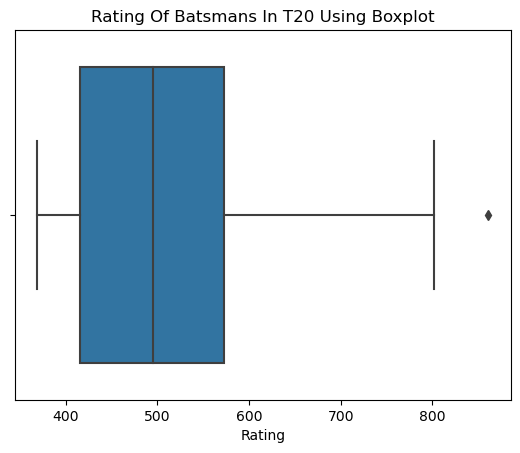

In [276]:
sns.boxplot(x=df["Rating"])
plt.title("Rating Of Batsmans In T20 Using Boxplot")

In [277]:
df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Year
0,1,Suryakumar Yadav,RH,India,861,910,New Zealand,2023
1,2,Phil Salt,RH,England,802,802,West Indies,2023
2,3,Mohammad Rizwan,RH,Pakistan,784,875,England,2022
3,4,Babar Azam,RH,Pakistan,763,896,England,2019
4,5,Aiden Markram,RH,South Africa,755,796,England,2021
...,...,...,...,...,...,...,...,...
95,96,Nikolaas Davin,RH,Namibia,376,540,Zimbabwe,2023
96,97,Ryan Burl,RH,Zimbabwe,372,407,Ireland,2021
97,98,Wessly Madhevere,RH,Zimbabwe,371,514,Afghanistan,2022
98,99,Matthew Short,RH,Australia,371,439,South Africa,2023


From the above plot we can say that
- 75% of players rating is above 420 and in between 25-50%,50% of players rating is above 520 and 25% of players rating is above 580.
- There are more players with rating in between 480 to 580.
- There is only 1 outlier in the Rating Series.
- Statistical Measures:
    - Minimum(LB)-184.375
    - First Quartile(Q1)-417.25
    - Median(Second Quartile(Q2))-495.0
    - Third Quartile(Q3)-572.50
    - Maximum(UP)-805.375
    - IQR(Q3-Q1)-155.25

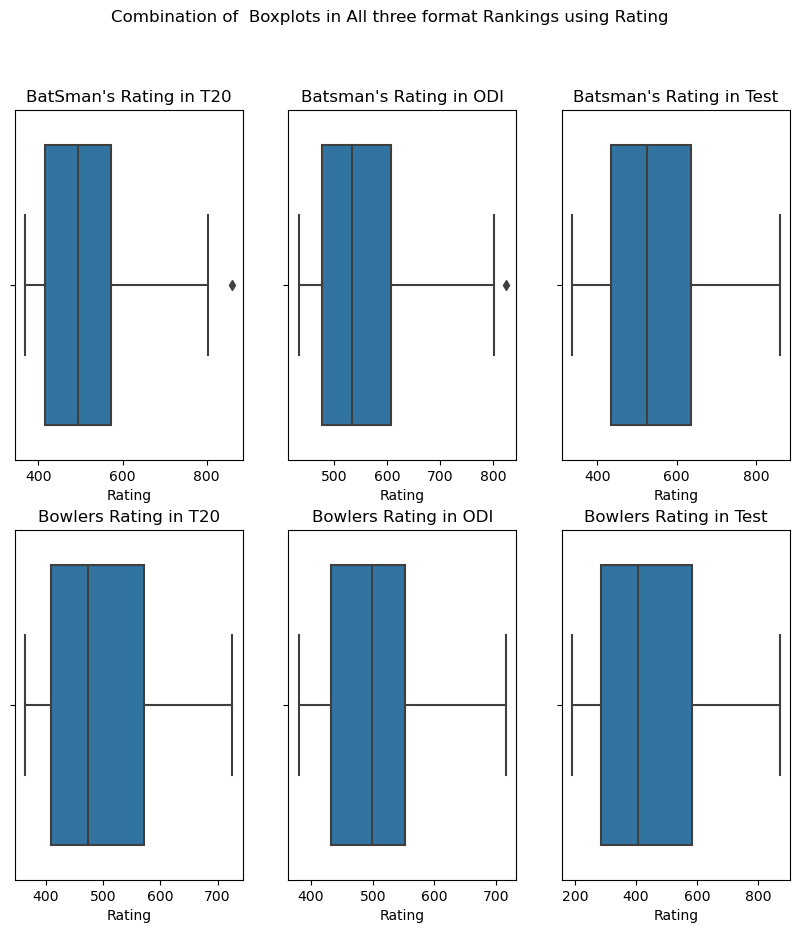

In [282]:
# Define the layout for subplots (2 row, 3 columns)
fig,axs=plt.subplots(2,3,figsize=(10,10))

# Plot boxplots on each subplot
sns.boxplot(ax=axs[0,0],x=df["Rating"])
sns.boxplot(ax=axs[0,1],x=df1["Rating"])
sns.boxplot(ax=axs[0,2],x=df2["Rating"])
sns.boxplot(ax=axs[1,0],x=df3["Rating"])
sns.boxplot(ax=axs[1,1],x=df4["Rating"])
sns.boxplot(ax=axs[1,2],x=df5["Rating"])


# Set titles for subplots
axs[0,0].set_title("BatSman's Rating in T20")
axs[0,1].set_title("Batsman's Rating in ODI")
axs[0,2].set_title("Batsman's Rating in Test")
axs[1,0].set_title("Bowlers Rating in T20")
axs[1,1].set_title("Bowlers Rating in ODI")
axs[1,2].set_title("Bowlers Rating in Test")


# Set the supertitle for the subplots
plt.suptitle("Combination of  Boxplots in All three format Rankings using Rating")
plt.show()

# To find the density of players rating we are using  kdeplot in All three formats.

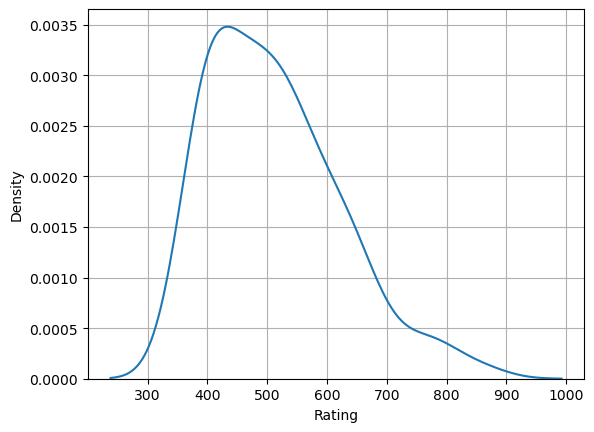

In [283]:
sns.kdeplot(x=df["Rating"])
plt.grid()

From the above plot we can say that
- There are more players with rating 400 to 480,the density is high,
- There are less players with arting above 800.

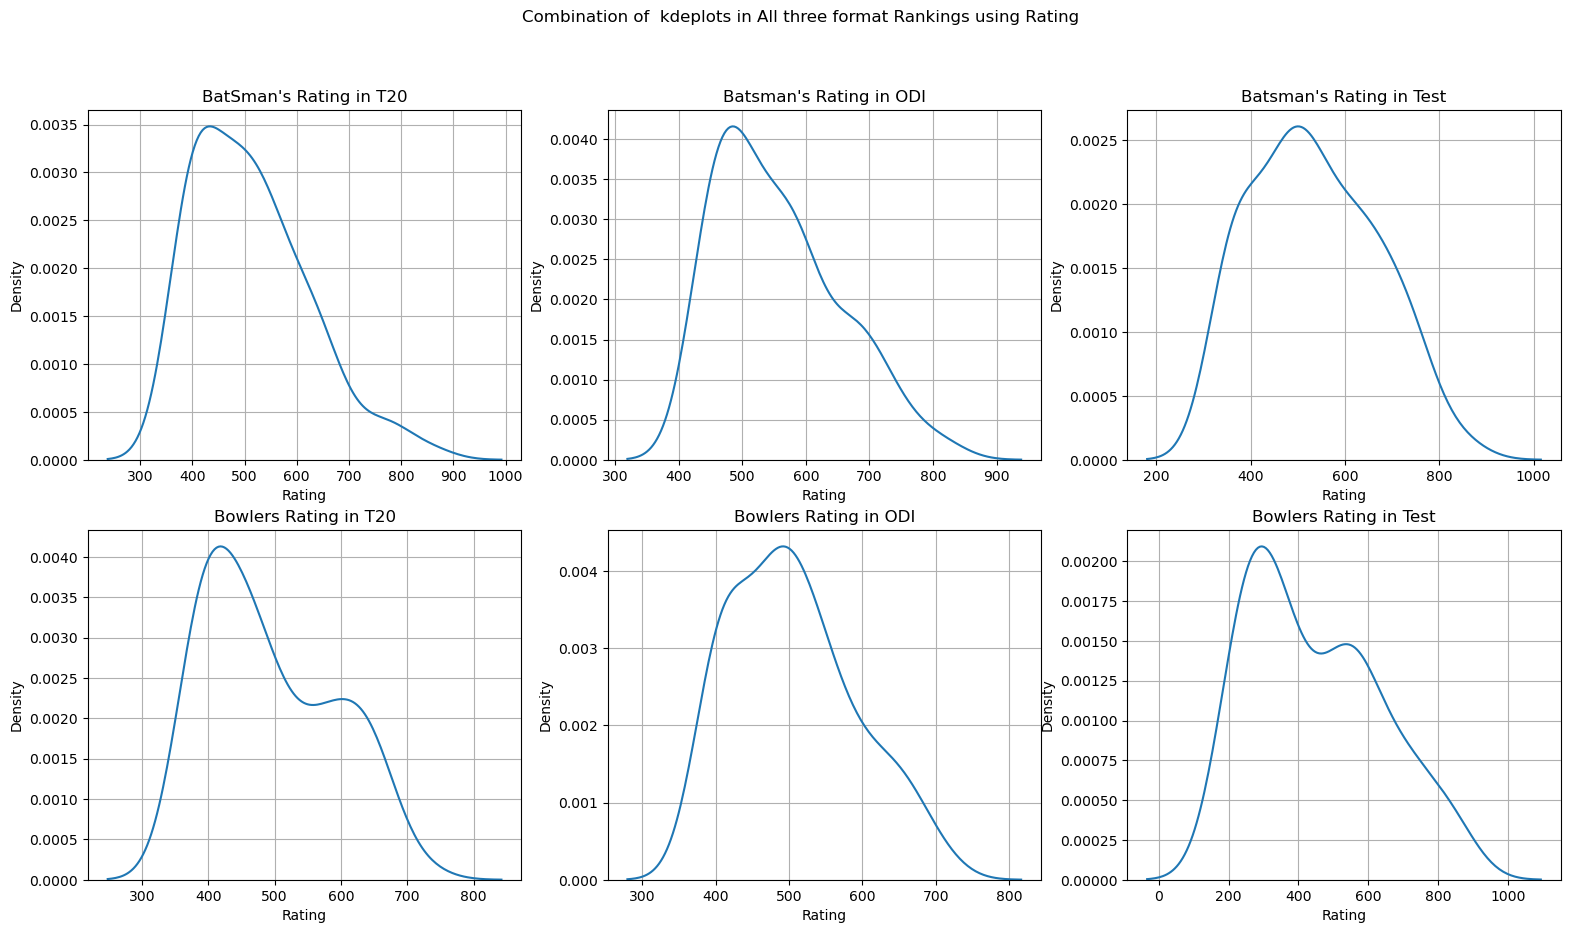

In [284]:
# Define the layout for subplots (2 row, 3 columns)
fig,axs=plt.subplots(2,3,figsize=(19,10))

# Plot kdeplot on each subplot
sns.kdeplot(ax=axs[0,0],x=df["Rating"])
sns.kdeplot(ax=axs[0,1],x=df1["Rating"])
sns.kdeplot(ax=axs[0,2],x=df2["Rating"])
sns.kdeplot(ax=axs[1,0],x=df3["Rating"])
sns.kdeplot(ax=axs[1,1],x=df4["Rating"])
sns.kdeplot(ax=axs[1,2],x=df5["Rating"])


# Set titles for subplots
axs[0,0].set_title("BatSman's Rating in T20")
axs[0,0].grid()
axs[0,1].set_title("Batsman's Rating in ODI")
axs[0,1].grid()
axs[0,2].set_title("Batsman's Rating in Test")
axs[0,2].grid()
axs[1,0].set_title("Bowlers Rating in T20")
axs[1,0].grid()
axs[1,1].set_title("Bowlers Rating in ODI")
axs[1,1].grid()
axs[1,2].set_title("Bowlers Rating in Test")
axs[1,2].grid()




# Set the supertitle for the subplots
plt.suptitle("Combination of  kdeplots in All three format Rankings using Rating")
plt.show()

# To find how many LH,RH batmans and RA,LA bowlers in All formats we are using piechart.

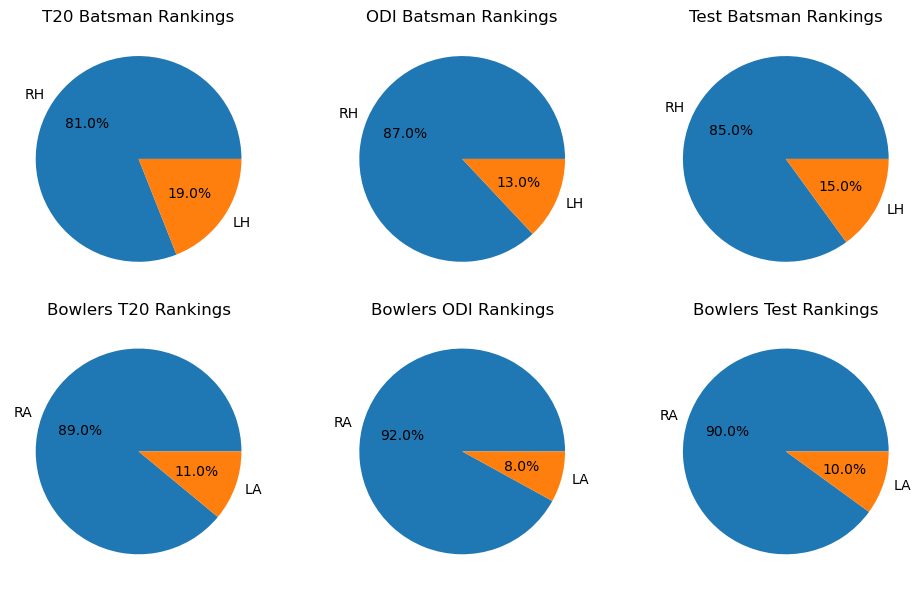

In [285]:
# Define the layout for subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot pie charts on each subplot
axs[0, 0].pie(df["Style"].value_counts(), labels=df["Style"].unique(), autopct="%0.1f%%")
axs[0, 1].pie(df1["Style"].value_counts(), labels=df1["Style"].unique(), autopct="%0.1f%%")
axs[0, 2].pie(df2["Style"].value_counts(), labels=df2["Style"].unique(), autopct="%0.1f%%")
axs[1, 0].pie(df3["Style"].value_counts(), labels=df3["Style"].unique(), autopct="%0.1f%%")
axs[1, 1].pie(df4["Style"].value_counts(), labels=df4["Style"].unique(), autopct="%0.1f%%")
axs[1, 2].pie(df5["Style"].value_counts(), labels=df5["Style"].unique(), autopct="%0.1f%%")

# Set titles for subplots
axs[0, 0].set_title("T20 Batsman Rankings")
axs[0, 1].set_title("ODI Batsman Rankings")
axs[0, 2].set_title("Test Batsman Rankings")
axs[1, 0].set_title("Bowlers T20 Rankings")
axs[1, 1].set_title("Bowlers ODI Rankings")
axs[1, 2].set_title("Bowlers Test Rankings")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From the above plot we can say that
- There are more RH batsmans Compared to LH batsman in T20 rankings.
- There are more RH batsmans Compared to LH batsman in ODI rankings.
- There are more RH batsmans Compared to LH batsman in Test rankings.
- There are more RA bowlers Compared to LH bowlers in T20 rankings.
- There are more RA bowlers Compared to LH bowlers in ODI rankings.
- There are more RA bowlers Compared to LH bowlers in Test rankings.

# To Know which Team Players are more involved in all three formats rankings we are using Countplot

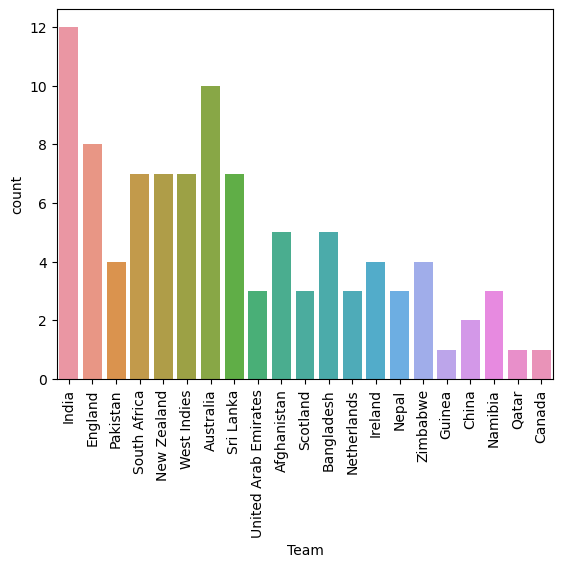

In [286]:
sns.countplot(x=df['Team'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Count'>

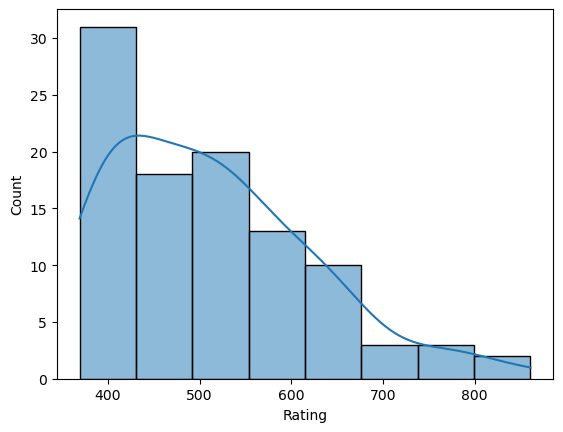

In [287]:
sns.histplot(x=df["Rating"],kde=True)

From the above plot we can say that
- There are more Indian players i.e,12 involved in T20 rankings compared to other teams.
- Canada,Qatar,Guinea (1)players are least involved in T20 rankings.

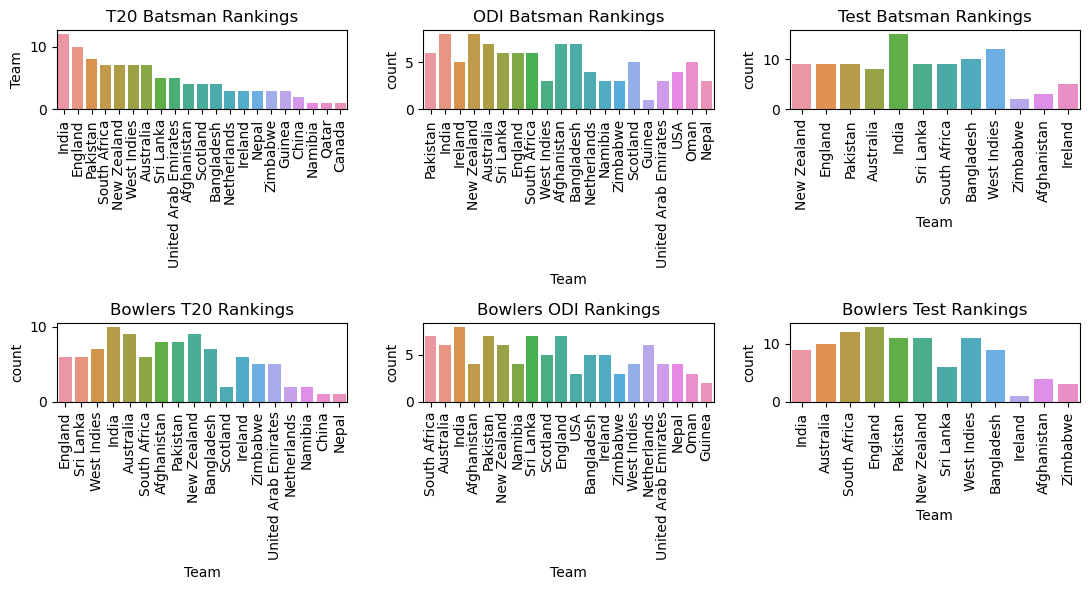

In [299]:
# Define the layout for subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(11, 6))

# Plot  Countplots on each subplot
sns.barplot(ax=axs[0,0],x=df["Team"].unique(),y=df["Team"].value_counts())
plt.setp(axs[0,0].get_xticklabels(), rotation=90) 
sns.countplot(ax=axs[0,1],x=df1["Team"])
plt.setp(axs[0,1].get_xticklabels(), rotation=90) 
sns.countplot(ax=axs[0,2],x=df2["Team"])
plt.setp(axs[0,2].get_xticklabels(), rotation=90) 
sns.countplot(ax=axs[1,0],x=df3["Team"])
plt.setp(axs[1,0].get_xticklabels(), rotation=90) 
sns.countplot(ax=axs[1,1],x=df4["Team"])
plt.setp(axs[1,1].get_xticklabels(), rotation=90) 
sns.countplot(ax=axs[1,2],x=df5["Team"])
plt.setp(axs[1,2].get_xticklabels(), rotation=90) 

# Set titles for subplots
axs[0, 0].set_title("T20 Batsman Rankings")
axs[0, 1].set_title("ODI Batsman Rankings")
axs[0, 2].set_title("Test Batsman Rankings")
axs[1, 0].set_title("Bowlers T20 Rankings")
axs[1, 1].set_title("Bowlers ODI Rankings")
axs[1, 2].set_title("Bowlers Test Rankings")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From the above plot we can say that
- There are more indian players involved in Batsman t20 rankings.
- There are more indian,Newzealand players involved in Batsman ODI rankings.
- There are more indian players involved in Batsman test rankings.
- There are more indian players involved in Batsman t20 rankings.
- There are more indian players involved in Bowlers t20 rankings.
- There are more indian players involved in Bowlers ODI rankings.
- There are more England players involved in Bowlers test rankings.

## Numerical vs Numerical PLots
- Scatterplot
- Lineplot

## Numerical vs Categorical plots
- Violin Plot
- Boxplot

# To Know how Ranks and CareerBestRatings are Related in All three formats we are using Scatterplot

<AxesSubplot:xlabel='Rank', ylabel='CareerBestRating'>

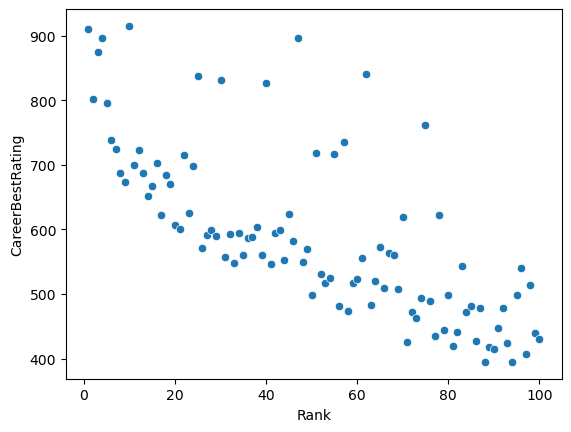

In [289]:
sns.scatterplot(x=df["Rank"],y=df["CareerBestRating"])

From the above plot we can say that
- In between 0 t0 40 ranks, players they have high CareerbestRating.
- In between 80 to 100 ranks,players have very less CareerbestRating.
- We can observe that as the Ranks of players increases corresponding their CarrerBestRating decreses.
- Finally we can conclude that Rank and CareerBestRating are negetively correlated.

# To find the relation between two variables i.e, how ranks and rating are related in All three formats we are using Lineplot

<AxesSubplot:xlabel='Rank', ylabel='Rating'>

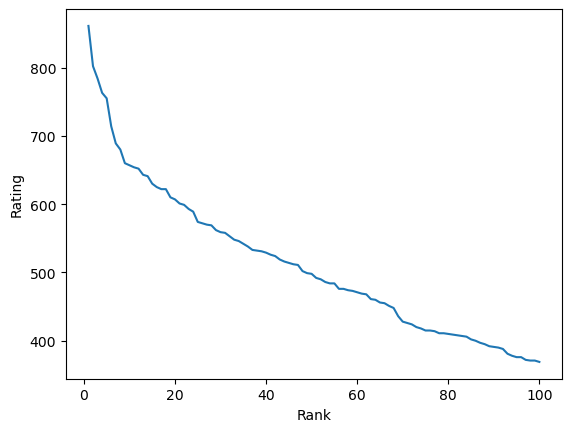

In [290]:
sns.lineplot(x=df["Rank"],y=df["Rating"])

From the above plot we can say that
- As the Rank is increasing the rating of players are decreasing,They are negetively correlated.

# To know the outliers and statistical measures along with density we are using violinplot.

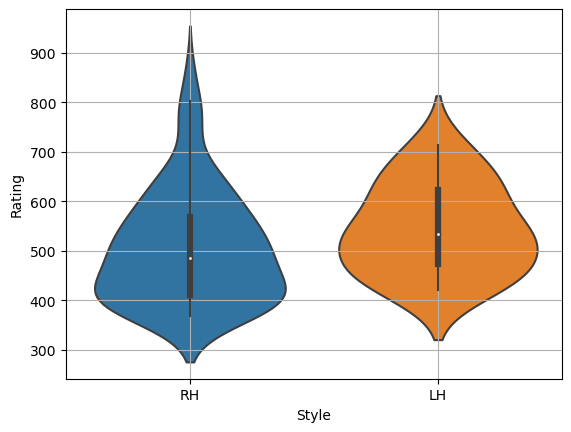

In [291]:
sns.violinplot(x=df["Style"],y=df["Rating"])
plt.grid()

From the above plot we can say that
- In between 420 to 500 the density of RH style batsmans is more and there are no RH style batsmans below 200.
- In between 450 to 550 the density of LH Bowlers is more.

# To find the outliers of we are using Boxplot.

<AxesSubplot:xlabel='Style', ylabel='Rating'>

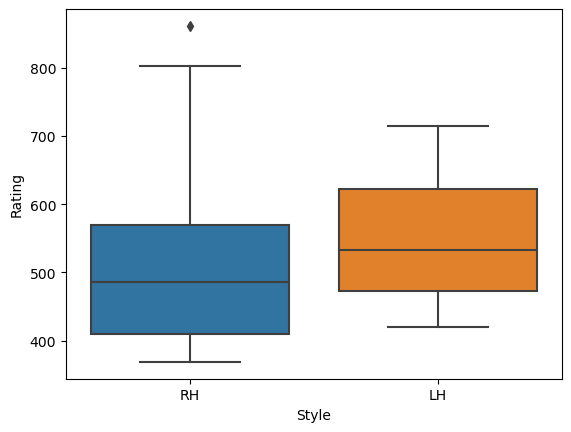

In [292]:
sns.boxplot(x=df["Style"],y=df["Rating"])

From the above plot we can say that
- There are More RH Style BatSmans in between 480 to 580 with rating in T20 rankings.
- There are more LH Style Batsmans in between 550 to 620 with rating in T2o Ratings.

# To know the relationship how rank and rating are related in All three formats we are using scatterplot.

<AxesSubplot:xlabel='Rank', ylabel='Rating'>

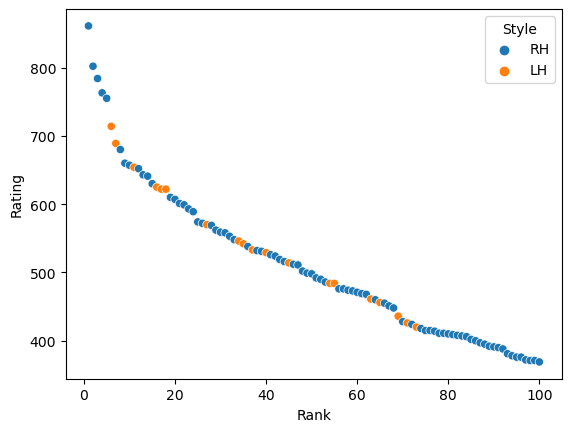

In [293]:
sns.scatterplot(x=df["Rank"],y=df["Rating"],hue=df["Style"])

From the above plot we can say that
- As the rank increases the rating is decreasing.So,they are negetively correlated.
- Finally we can say that the players with below 20 ranks has more ratings compared to above 60.

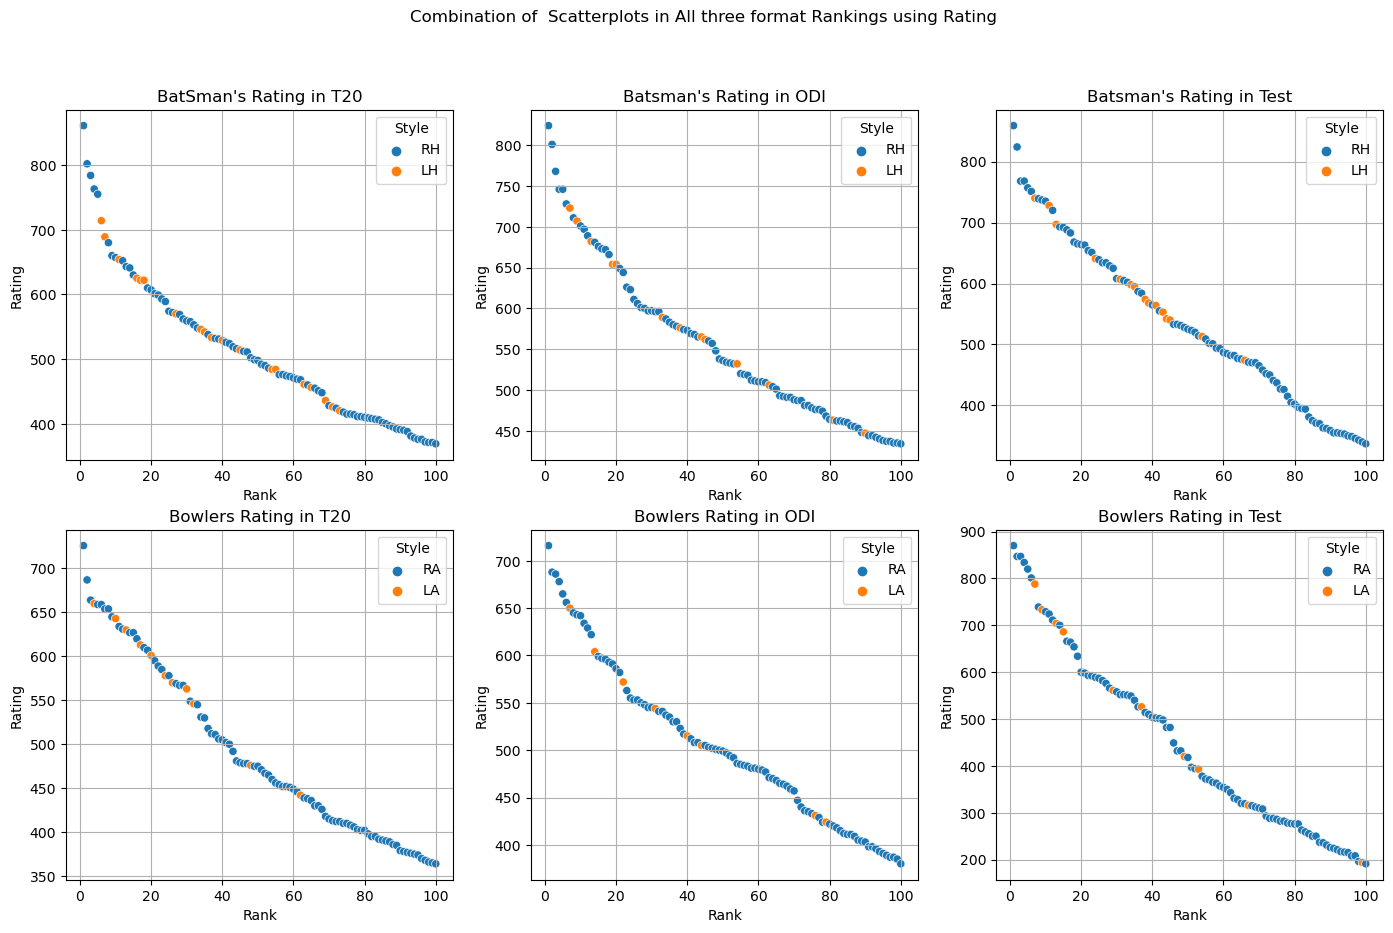

In [298]:
# Define the layout for subplots (2 row, 3 columns)
fig,axs=plt.subplots(2,3,figsize=(17,10))

# Plot kdeplot on each subplot
sns.scatterplot(ax=axs[0,0],x=df["Rank"],y=df["Rating"],hue=df["Style"])
sns.scatterplot(ax=axs[0,1],x=df1["Rank"],y=df1["Rating"],hue=df1["Style"])
sns.scatterplot(ax=axs[0,2],x=df2["Rank"],y=df2["Rating"],hue=df2["Style"])
sns.scatterplot(ax=axs[1,0],x=df3["Rank"],y=df3["Rating"],hue=df3["Style"])
sns.scatterplot(ax=axs[1,1],x=df4["Rank"],y=df4["Rating"],hue=df4["Style"])
sns.scatterplot(ax=axs[1,2],x=df5["Rank"],y=df5["Rating"],hue=df5["Style"])


# Set titles for subplots
axs[0,0].set_title("BatSman's Rating in T20")
axs[0,0].grid()
axs[0,1].set_title("Batsman's Rating in ODI")
axs[0,1].grid()
axs[0,2].set_title("Batsman's Rating in Test")
axs[0,2].grid()
axs[1,0].set_title("Bowlers Rating in T20")
axs[1,0].grid()
axs[1,1].set_title("Bowlers Rating in ODI")
axs[1,1].grid()
axs[1,2].set_title("Bowlers Rating in Test")
axs[1,2].grid()




# Set the supertitle for the subplots
plt.suptitle("Combination of  Scatterplots in All three format Rankings using Rating")
plt.show()

+# To find the correlation between two entites(variables) we are using heatmap.

<AxesSubplot:>

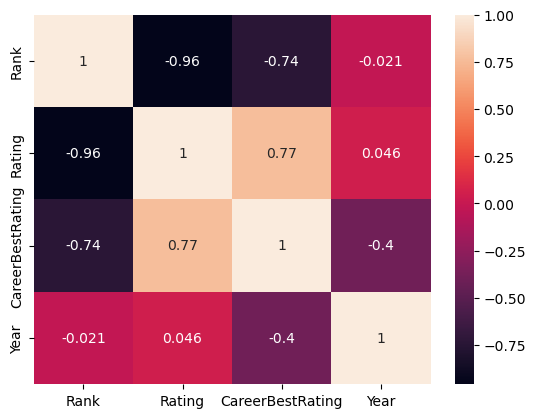

In [294]:
sns.heatmap(df.corr(),annot=True)

From the above plot we can say that
- Rank and CareerBestRating are negetively correlated means as Rank is increasing CareerBestRating of players is decreasing,
- Rank and Rating are negetively correlated means as Rank is increasing Rating of players is decreasing,
- Rating and CareerBestRating are positively correlated means as Rating is increasing CareerBestRating of players also increasing.
- Rating and Rank are negetively correlated means as Rating is increasing Rank of players decreasing.
- CareerBestRating and Rating are positively correlated means as CareerBestRating is increasing Rating of players also increasing 
- CareerBestRating and Rank are negetively correlated means as CareerBestRating is increasing Rank of players decreasing.

# Observations:
Scatterplot & Heatmap:
- From the above analysis we can infer that players below rank 20 have high rating compared to others.So,we can
  say that as the rank is increasing the rating of batsmans and bowlers is falling down,

- To be in Top 10 rankings the player should maintain stability on rating by scoring runs.

Bargraph & Countplot:
- From the above  analysis we can infer that there are more players in indian team in all formats of cricket compared
  to other teams.

- There are more RH,RA style batsmans and bowlers in Rankings compared to LH,LA style batsmans and bowlers.

Densityplot & violinplot:
- From the above analysis we can infer that players rating is more in between 400 to 600 and less above  850.

- Therefore we can predict that in between 400 to 600 we can see more players ratings.

# Conclusion:

The project aim is to analyze the rankings and ratings in all three formats of cricket

- From above analysis we can conclude that if more  players are involved in rankings  then
  there team popularity increases and that team will be in good position in ICC Cricket Ramkings


- We can also predict if the players maintains a Average rating above 600 there will high chances to be in 
  Top 10 Rankings in all three formats of cricket.


- This way we can analyse the areas of improvement of players to have better ranks and rating in 
  all three formats of cricket.

